In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
all_files = glob.glob("../exp/ytc/results.*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
#df = pd.read_csv('results.csv')}

In [36]:
df_accuracy = df.groupby(['query_size', 'tau']).correct.mean().reset_index(drop=False)
df_payload = df.groupby(['query_size', 'tau']).payload_size.mean().reset_index(drop=False)

In [37]:
selected = 5.5
max_idf = 6.642486801367256

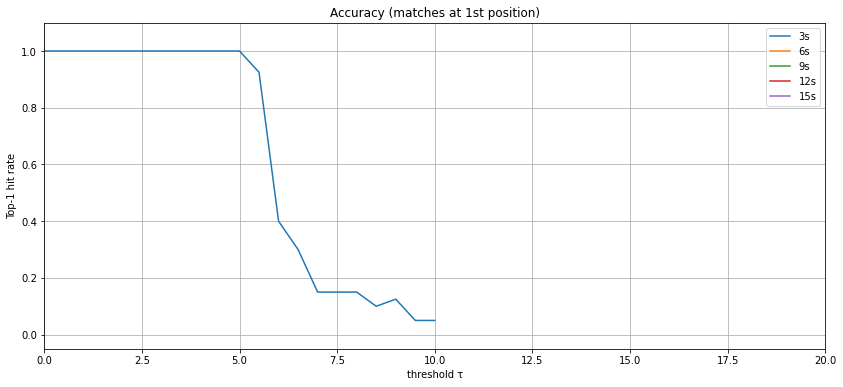

In [38]:
plt.figure(figsize=(14, 6))
for sz in [3, 6, 9, 12, 15]:
    dfx = df_accuracy[df_accuracy.query_size==sz]
    plt.plot(dfx.tau, dfx.correct, label='%ss' % sz)    
    plt.xlim((0, 30))
#plt.vlines(max_idf, -0.05, 1.1, color='gray', linewidth=1, linestyles='--')
#plt.vlines(selected, -0.05, 1.1, color='red', linewidth=1, linestyles='--')
plt.ylim((-0.05, 1.1))
plt.title("Accuracy (matches at 1st position)")
plt.xlabel('threshold τ')
plt.ylabel('Top-1 hit rate')
plt.grid()
plt.legend()
plt.xlim((0, 20))
plt.savefig('matches_first_pos.pdf')
plt.show()


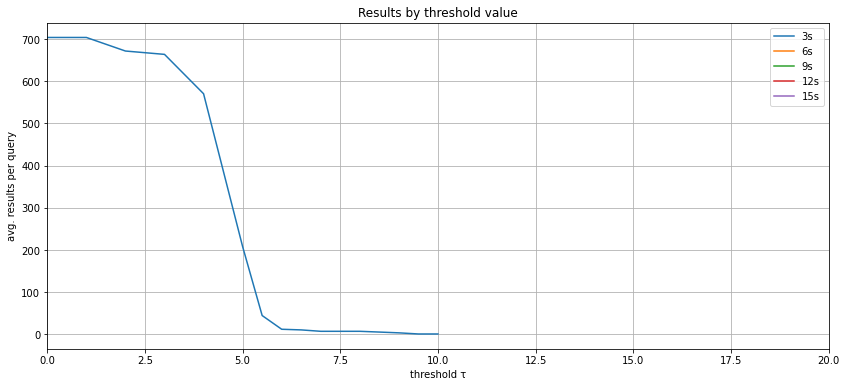

In [39]:
plt.figure(figsize=(14, 6))
for sz in [3, 6, 9, 12, 15]:
    dfx = df_payload[df_payload.query_size==sz]
    plt.plot(dfx.tau, dfx.payload_size, label='%ss' % sz)
ymin, ymax = plt.ylim()
#plt.vlines(max_idf, ymin, ymax, color='gray', linewidth=1, linestyles='--')
#plt.vlines(selected, ymin, ymax, color='red', linewidth=1, linestyles='--')
plt.xlim((0, 30))
plt.grid()
plt.title('Results by threshold value')
plt.xlabel('threshold τ')
plt.ylabel('avg. results per query')
plt.xlim((0, 20))
plt.legend()
plt.savefig('avg_results_vs_threshold.pdf')
plt.show()

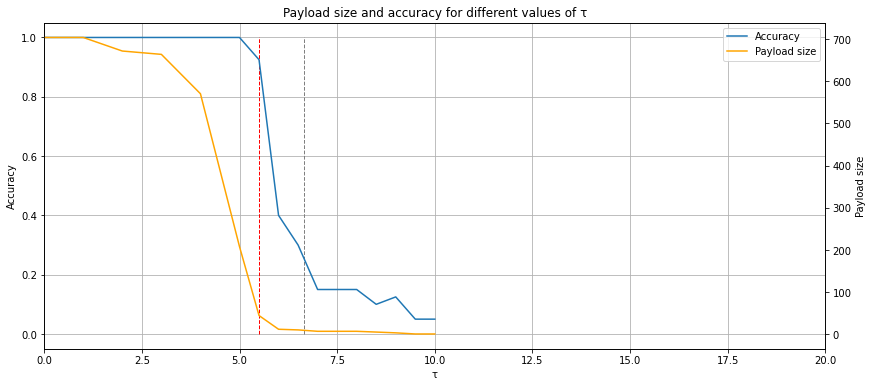

In [42]:
fig, ax1 = plt.subplots(figsize=(14, 6))
dfv = df.groupby('tau').mean().reset_index(drop=False)
dfv = dfv[dfv.query_size <= 9.0]
ax2 = ax1.twinx()
lns1 = ax1.plot(dfv.tau, dfv.correct, label='Accuracy')
lns2 = ax2.plot(dfv.tau, dfv.payload_size, label='Payload size', color='orange')
ymin, ymax = ax1.get_ylim()

ax1.vlines(max_idf, 0, 1, color='gray', linewidth=1, linestyles='--')
ax1.vlines(selected, 0, 1, color='red', linewidth=1, linestyles='--')


ax1.set_xlabel('τ')
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Payload size')
ax1.grid()

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
plt.title("Payload size and accuracy for different values of τ")
plt.xlim((0, 20))
plt.savefig('comparison_by_threshold.pdf')
plt.show()


In [7]:
df[(df.tau==7.0) & (df.query_size <= 9.0)].mean()

query_size     NaN
query_idx      NaN
tau            NaN
payload_size   NaN
correct        NaN
dtype: float64